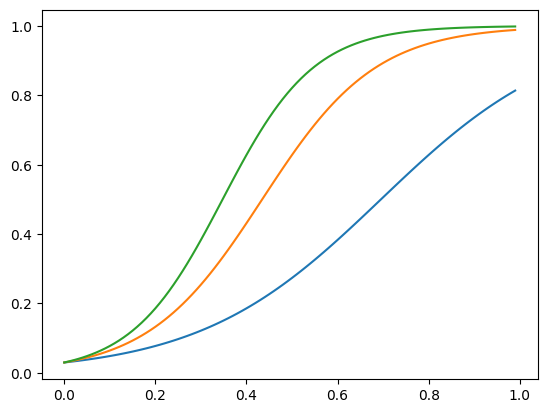

In [1]:
# リスト 9.1 SI modelでの感染者割合の時間変化
import matplotlib.pyplot as plt
#from scipy import optimize, exp
from scipy import optimize
import numpy as np

x = range(100)
y = [0] * 100
x0 = 0.03
b = 5
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * np.exp(b * (x * 0.01))/(1 - x0 + x0 * np.exp(b * (x * 0.01))), x)))
b = 8
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * np.exp(b * (x * 0.01))/(1 - x0 + x0 * np.exp(b * (x * 0.01))), x)))
b = 10
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * np.exp(b * (x * 0.01))/(1 - x0 + x0 * np.exp(b * (x * 0.01))), x)))
plt.show()

In [ ]:
# リスト 9.2 NDlibによるSIR modelでの感染者数の時間変化
!pip install -q ndlib
#!pip install -q bokeh

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.epidemics as ep

g = nx.erdos_renyi_graph(1000, 0.1)
#print(nx.info(g))

#model = sir.SIRModel(g)
model = ep.SIRModel(g)

import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(config)

iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

#from bokeh.io import output_notebook, show
#output_notebook()
#from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import matplotlib
%matplotlib inline

viz = DiffusionTrend(model, trends)
#p = viz.plot(width=400, height=400)
viz.plot()
#show(p)
plt.show()

#from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz2 = DiffusionPrevalence(model, trends)
#p2 = viz2.plot(width=400, height=400)
viz2.plot()
#show(p2)
plt.show()